In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [97]:
df=pd.read_csv("vehicle_preformance.csv")

In [98]:
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [100]:
cat_cols=df.select_dtypes(include=["O"])
cat_cols

,horsepower,name
0,130,chevrolet chevelle malibu
1,165,buick skylark 320
2,150,plymouth satellite
3,150,amc rebel sst
4,140,ford torino
...,...,...
393,86,ford mustang gl
394,52,vw pickup
395,84,dodge rampage
396,79,ford ranger


In [101]:
df["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [102]:
df["horsepower"]=df["horsepower"].replace("?",np.nan)
df["horsepower"]=df["horsepower"].astype("float")
df["horsepower"]=df["horsepower"].fillna(df['horsepower'].mean())

In [103]:
from sklearn.preprocessing import LabelEncoder

In [104]:
le=LabelEncoder()

In [105]:
df["name"]=le.fit_transform(df["name"])

In [106]:
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,49,7.652587
1,1,8,350.0,165.0,3693,11.5,1970,36,6.377156
2,1,8,318.0,150.0,3436,11.0,1970,231,7.652587
3,1,8,304.0,150.0,3433,12.0,1970,14,6.802299
4,1,8,302.0,140.0,3449,10.5,1970,161,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6,1982,153,11.478880
394,2,4,97.0,52.0,2130,24.6,1982,301,18.706323
395,1,4,135.0,84.0,2295,11.6,1982,119,13.604599
396,1,4,120.0,79.0,2625,18.6,1982,159,11.904024


In [107]:
num_cols=df.select_dtypes(include=["int","float"])

In [108]:
num_cols.head(5)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,49,7.652587
1,1,8,350.0,165.0,3693,11.5,1970,36,6.377156
2,1,8,318.0,150.0,3436,11.0,1970,231,7.652587
3,1,8,304.0,150.0,3433,12.0,1970,14,6.802299
4,1,8,302.0,140.0,3449,10.5,1970,161,7.227443


In [109]:
df['year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982], dtype=int64)

In [110]:
df["YEAR"]=1990-df["year"]

In [111]:
df.drop(["year"],axis=1,inplace=True)

In [112]:
df.describe()

,origin,cylinders,displacement,horsepower,weight,acceleration,name,Kilometer_per_liter,YEAR
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,104.469388,2970.424623,15.568090,148.550251,9.997073,13.989950
std,0.802055,1.701004,104.269838,38.199187,846.841774,2.757689,89.495880,3.322917,3.697627
min,1.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,0.000000,3.826293,8.000000
25%,1.000000,4.000000,104.250000,76.000000,2223.750000,13.825000,65.250000,7.440015,11.000000
50%,1.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,150.000000,9.778305,14.000000
75%,2.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,225.750000,12.329168,17.000000
max,3.000000,8.000000,455.000000,230.000000,5140.000000,24.800000,304.000000,19.811697,20.000000


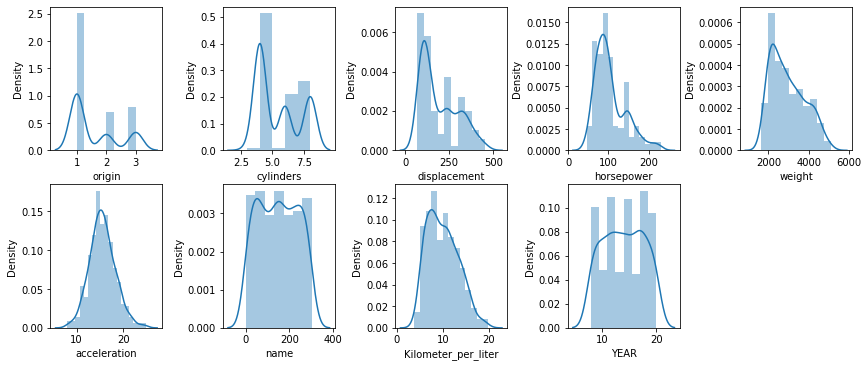

In [113]:
plt.figure(figsize=(12,12))
count=1
for i in df:
    plt.subplot(5,5,count)
    sns.distplot(df[i])
    count+=1
plt.tight_layout(pad=0.5,w_pad=0.5,h_pad=0.2)

In [118]:
df["KMP LITER"]=df["Kilometer_per_liter"]

In [119]:
df.drop(["Kilometer_per_liter"],axis=1,inplace=True)

<AxesSubplot:>

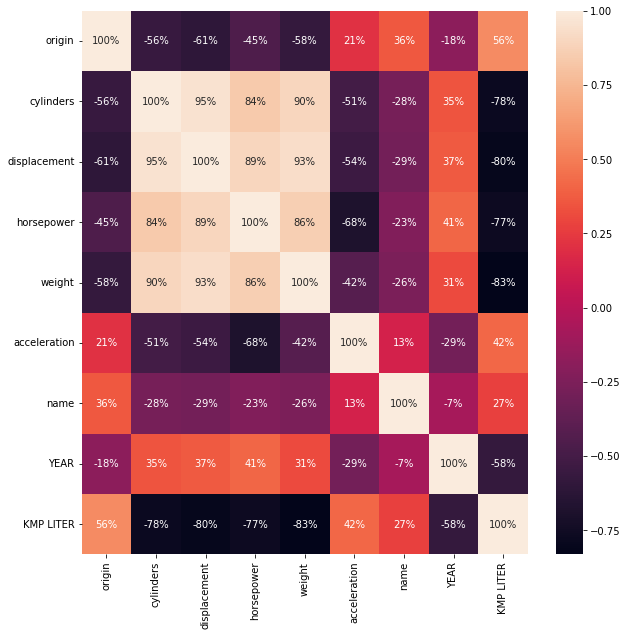

In [120]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".0%")

In [121]:
X=df.iloc[:,:-1]

In [122]:
Y=df.iloc[:,-1]

In [123]:
from sklearn.model_selection import train_test_split

In [125]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=90)

In [126]:
from sklearn.linear_model import LinearRegression

In [127]:
model=LinearRegression()

In [133]:
from sklearn.model_selection import cross_val_score
model_cv=cross_val_score(model,X,Y,cv=5)
model_cv

array([0.5805375 , 0.68966298, 0.81065258, 0.68801809, 0.22576758])

In [134]:
model.fit(X_train,Y_train)

LinearRegression()

In [135]:
Y_pred_train=model.predict(X_train)
Y_pred_test=model.predict(X_test)

In [136]:
from sklearn.metrics import mean_squared_error,r2_score
print("Train Data")
print("RMSE:", round(np.sqrt(mean_squared_error(Y_train,Y_pred_train)),2))
print("R2 Score:",round(r2_score(Y_train,Y_pred_train),2))
print("Test Data")
print("RMSE:", round(np.sqrt(mean_squared_error(Y_test,Y_pred_test)),2))
print("R2 Score:",round(r2_score(Y_test,Y_pred_test),2))

Train Data
RMSE: 1.41
R2 Score: 0.83
Test Data
RMSE: 1.41
R2 Score: 0.8


# RIDGE AND LASSO FOR THE SAME.

In [139]:
from sklearn.linear_model import Ridge,Lasso

In [137]:
l1=Ridge(10)
l1.fit(X_train,Y_train)

Ridge(alpha=10)

In [138]:
from sklearn.model_selection import cross_val_score
l1_cv=cross_val_score(l1,X,Y,cv=5)
l1_cv

array([0.58253537, 0.68923298, 0.81117596, 0.69003001, 0.21875755])

In [140]:
def metrics(Y_actual,Y_pred):
    r2=r2_score(Y_actual,Y_pred)
    RMSE=np.sqrt(mean_squared_error(Y_actual,Y_pred))
    print("R2 Score: {}|RMSE:{}".format(round(r2,2),round(RMSE,2)))

In [141]:
y_pred_train=l1.predict(X_train)
y_pred_test=l1.predict(X_test)

In [142]:
print("Training performance")
metrics(Y_train,y_pred_train)
print("Testing performnance")
metrics(Y_test,y_pred_test)

Training performance
R2 Score: 0.83|RMSE:1.41
Testing performnance
R2 Score: 0.8|RMSE:1.41
